In [1]:
import findspark
findspark.find()
findspark.init()
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

23/02/17 08:25:48 WARN Utils: Your hostname, kekeli-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/02/17 08:25:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/17 08:25:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/02/17 08:25:53 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
df_housing = spark.read.csv('housing.csv', header=True,
inferSchema=True)
df_housing.cache()

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double, ocean_proximity: string]

In [14]:
df_housing.show(5).collect()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

AttributeError: 'NoneType' object has no attribute 'collect'

In [7]:
df_housing.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



In [8]:
df_housing.agg({"longitude": "max"}).collect()

[Row(max(longitude)=-114.31)]

In [9]:
df_housing.agg({"longitude": "min"}).collect()

[Row(min(longitude)=-124.35)]

In [10]:
df_housing.agg({"population": "max"}).collect()

[Row(max(population)=35682.0)]

In [11]:
df_housing.agg({"population": "min"}).collect()

[Row(min(population)=3.0)]

In [12]:
df_housing.agg({"population": "avg"}).collect()

[Row(avg(population)=1425.4767441860465)]

In [15]:
df_housing.count()

20640

In [16]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

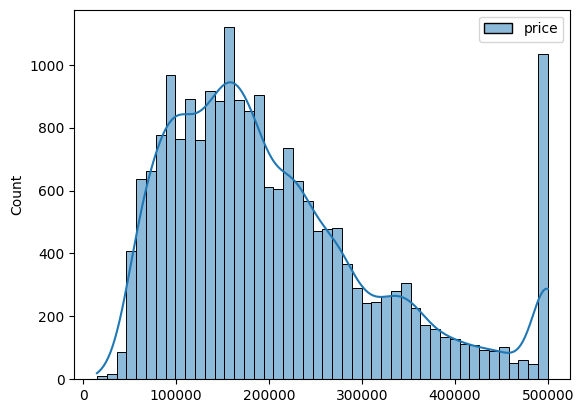

In [17]:
df_housing = df_housing.withColumnRenamed('median_house_value','price')
sns.histplot(df_housing.select('price').toPandas(), kde=True)

<AxesSubplot: xlabel='housing_median_age', ylabel='avg(price)'>

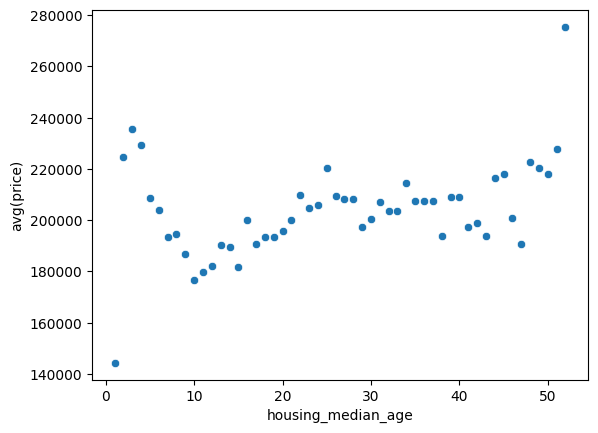

In [18]:
df = df_housing.groupby('housing_median_age')\
.avg()\
.sort('housing_median_age')\
.select(['housing_median_age','avg(price)'])
df = df.toPandas()
sns.scatterplot(x = df['housing_median_age'], y = df['avg(price)'])

<AxesSubplot: xlabel='avg(median_income)', ylabel='avg(price)'>

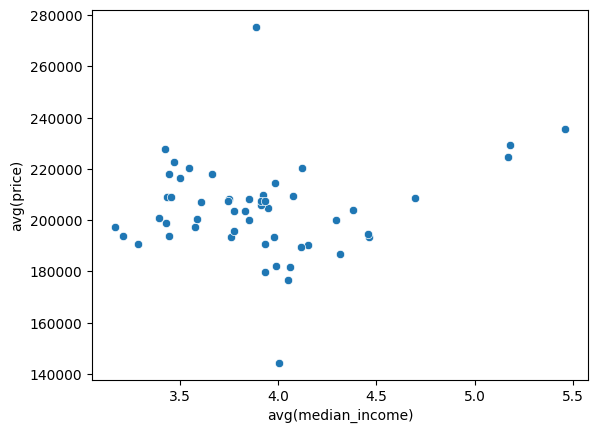

In [23]:
# visualizing relationship between median_income and price
df = df_housing.groupby('housing_median_age')\
.avg()\
.sort('housing_median_age')\
.select(['avg(median_income)','avg(price)'])
df = df.toPandas()
sns.scatterplot(x = df['avg(median_income)'], y = df['avg(price)'])

<AxesSubplot: xlabel='avg(total_rooms)', ylabel='avg(price)'>

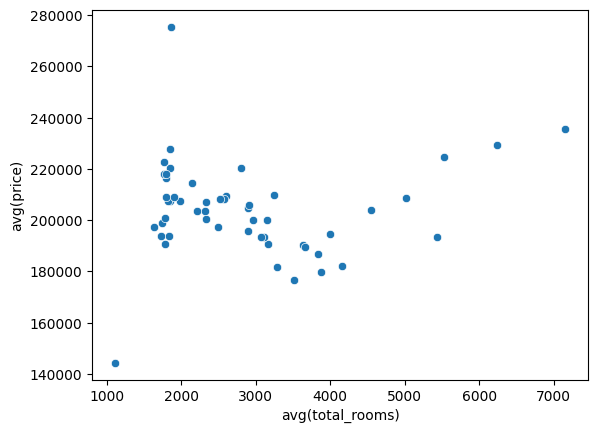

In [24]:
# visualizing relationship between total_rooms and price
df = df_housing.groupby('housing_median_age')\
.avg()\
.sort('housing_median_age')\
.select(['avg(total_rooms)','avg(price)'])
df = df.toPandas()
sns.scatterplot(x = df['avg(total_rooms)'], y = df['avg(price)'])

<AxesSubplot: xlabel='avg(total_bedrooms)', ylabel='avg(price)'>

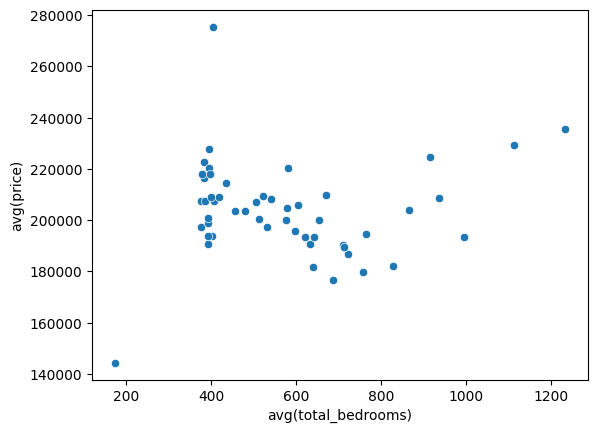

In [25]:
# visualizing relationship between total_bedrooms and price
df = df_housing.groupby('housing_median_age')\
.avg()\
.sort('housing_median_age')\
.select(['avg(total_bedrooms)','avg(price)'])
df = df.toPandas()
sns.scatterplot(x = df['avg(total_bedrooms)'], y = df['avg(price)'])

<AxesSubplot: xlabel='ocean_proximity', ylabel='avg(price)'>

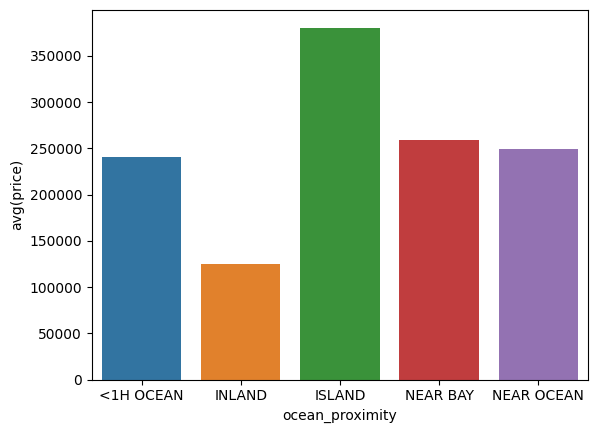

In [28]:
# visualizing relationship between ocean_proximity and price
df = df_housing.groupby('ocean_proximity')\
.avg()\
.sort('ocean_proximity')\
.select(['ocean_proximity','avg(price)'])
df = df.toPandas()
sns.barplot(x = df['ocean_proximity'], y = df['avg(price)'])

In [53]:
from pyspark.sql.functions import isnan, when, count, col

In [58]:
df_housing.select([count(when(col(c).isNull(), c)).alias(c) for c in df_housing.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|price|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
|        0|       0|                 0|          0|           207|         0|         0|            0|    0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+



In [62]:
df =df_housing.na.fill({'total_bedrooms': 'avg'})

In [63]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|price|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+
|        0|       0|                 0|          0|           207|         0|         0|            0|    0|              0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-----+---------------+

